# Importation des bibliothèques

In [ ]:
import numpy as np # est une bibliothèque pour effectuer des calculs numériques
import pandas as pd # est une bibliothèque pour la manipulation et l'analyse des données.
import matplotlib.pyplot as plt # utilisée pour la visualisation des données.
import seaborn as sns # utilisée pour la visualisation des données.
from sklearn.cluster import KMeans # importe la classe KMeans de la bibliothèque sklearn.cluster.

# Chargement des données

In [ ]:
customer_data = pd.read_csv('/content/Mall_Customers.csv')
# charger un jeu de données de clients à partir d'un fichier CSV en utilisant
#la fonction read_csv de la bibliothèque Pandas.

# Exploration des données


In [ ]:
customer_data.head() # Afficher par défaut les cinq premières lignes du DataFrame

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
customer_data.shape # Afficher tuple qui représente les dimensions du DataFrame

(200, 5)

In [ ]:
customer_data.info() # Afficher des informations sur le DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
customer_data.isnull().sum() # Afficher le nombre de valeurs nulles pour chaque colonne de votre DataFrame

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

# Prétraitement des données

In [ ]:
X = customer_data.iloc[:,[3,4]].values # crée un tableau NumPy 'X' contenant les valeurs des colonnes
#"Annual Income" et "Spending Score" du DataFrame.

In [ ]:
print(X) # Affichera simplement le contenu du tableau NumPy 'X'

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]


# Choix du nombre de clusters :



l'inertie mesure à quel point les points de données d'un cluster sont proches les uns des autres. Une valeur plus faible de l'inertie indique que les points de données sont plus proches de leur centroïde, ce qui est généralement souhaitable car cela signifie que les clusters sont plus compacts et bien définis.

In [ ]:
# effectue une boucle sur différentes valeurs de n_clusters pour l'algorithme K-means afin de trouver la valeur optimale de clusters.
wcss = [] # Initialise une liste vide pour stocker les valeurs de l'inertie.

for i in range(1,11): # Itère sur les valeurs de n_clusters de 1 à 10
  kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)# initialise un objet KMeans avec un certain nombre de clusters,
  # une méthode d'initialisation intelligente des centroids, et une graine pour l'initialisation aléatoire
  kmeans.fit(X) # Applique l'algorithme K-means aux données 'X'

  wcss.append(kmeans.inertia_) # Ajoute la valeur de l'inertie à la liste wcss.

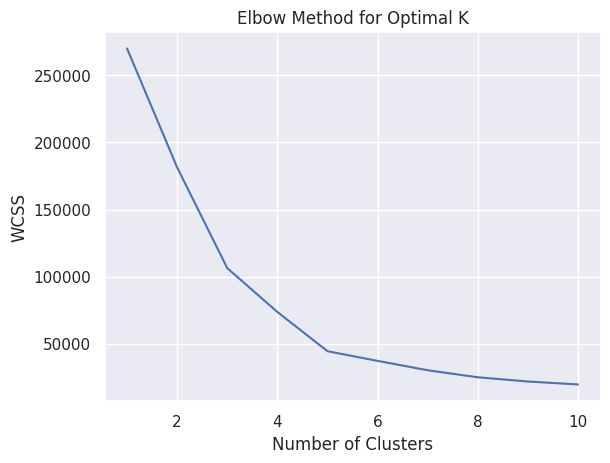

In [ ]:
# Tracer le graphique du coude (elbow point graph)
sns.set() # Configure les paramètres esthétiques par défaut de seaborn
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

le graphique du coude a probablement montré une diminution significative de l'inertie jusqu'à environ 5 clusters, après quoi la diminution devient moins prononcée. Cela indique que 5 clusters fournissent un bon compromis entre la simplification de la structure des données et la représentation précise des clusters.


# Entraînement du modèle K-means

In [ ]:
# Initialise un objet KMeans avec 5 clusters,
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# Retourne les labels des clusters pour chaque point de données.
# Ces labels sont stockés dans la variable Y.
Y = kmeans.fit_predict(X)

print(Y) # Affiche les labels des clusters pour chaque point de données.

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


5 Clusters - 0, 1, 2, 3, 4

# Visualisation des clusters

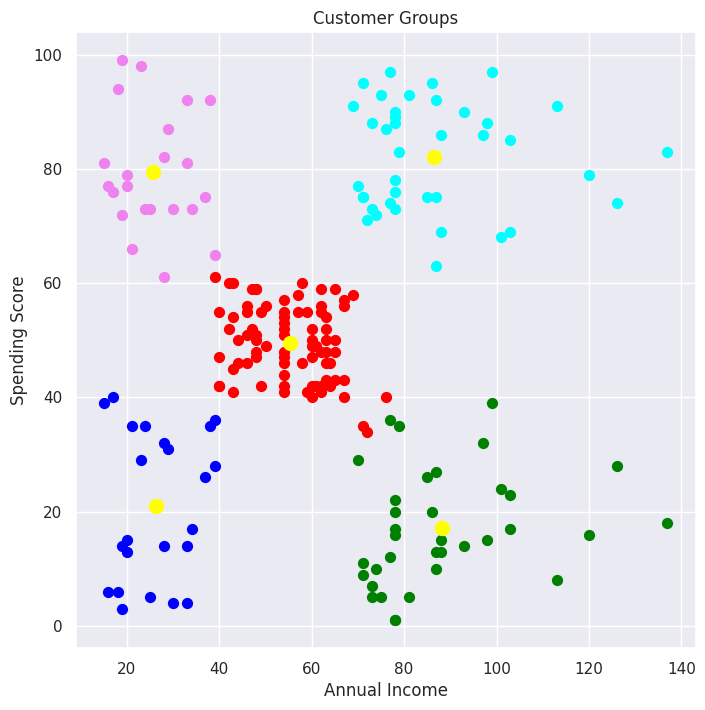

In [ ]:
# trace un graphique qui représente les clusters formés par l'algorithme K-means ainsi que leurs centroids

plt.figure(figsize=(8,8))
plt.scatter(X[Y==0,0], X[Y==0,1], s=50, c='green', label='Cluster 1')
plt.scatter(X[Y==1,0], X[Y==1,1], s=50, c='red', label='Cluster 2')
plt.scatter(X[Y==2,0], X[Y==2,1], s=50, c='cyan', label='Cluster 3')
plt.scatter(X[Y==3,0], X[Y==3,1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[Y==4,0], X[Y==4,1], s=50, c='blue', label='Cluster 5')

# Trace les centroids des clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

# Analyse des clusters

1. Cluster en bleu : Ce cluster représente les clients ayant un faible revenu annuel et un faible score de dépenses. Ces clients pourraient être des consommateurs plus prudents qui dépensent avec parcimonie.
2. Cluster en vert : Ce cluster représente les clients ayant un revenu annuel élevé mais un faible score de dépenses. Ces clients pourraient être des consommateurs prudents ou ceux qui préfèrent économiser ou investir leur argent plutôt que de le dépenser.
3. Cluster en violet : Ce cluster représente les clients ayant un faible revenu annuel mais un score de dépenses élevé. Ces clients pourraient être des consommateurs impulsifs ou ceux qui attachent peu d'importance à leur revenu lorsqu'ils dépensent.
4. Cluster en rouge : Ce cluster représente les clients ayant un revenu annuel moyen et un score de dépenses moyen. Ces clients pourraient constituer le segment le plus large et représenter la majorité des clients dans le centre commercial.
5. Cluster en cyan : Ce cluster représente les clients ayant un revenu annuel élevé et un score de dépenses élevé. Ces clients pourraient être des consommateurs dépensiers qui n'hésitent pas à dépenser pour des produits ou services de qualité.

Ces analyses peuvent aider les entreprises à mieux comprendre leurs clients et à adapter leurs stratégies marketing pour répondre aux besoins spécifiques de chaque segment de clientèle.